# Pandas - Agrupaciones y agregaciones.

In [1]:
import numpy as np
import pandas as pd
import dateutil 
%matplotlib inline

In [2]:
dataset = pd.read_csv('datos/data/phone_data.csv',index_col=0)
dataset.head()

,date,duration,item,month,network,network_type
index,,,,,,
0,15/10/14 06:58,34.429,data,2014-11,data,data
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [3]:
# podemos ver la cantidad de registros.
dataset['item'].count()

830

In [4]:
# Podemos ver las dimensiones del data set
dataset.shape

(830, 6)

In [5]:
# Podemos ver la cantidad de registros
dataset.shape

(830, 6)

In [6]:
# Sacamos informacion de estructura del DF
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          830 non-null    object 
 1   duration      830 non-null    float64
 2   item          830 non-null    object 
 3   month         830 non-null    object 
 4   network       830 non-null    object 
 5   network_type  830 non-null    object 
dtypes: float64(1), object(5)
memory usage: 45.4+ KB


In [7]:
# Observamos ue el atributo date tiene formato object.
samples = dataset['date'].sample(3)
display(samples)

index
423    20/12/14 15:53
603    16/01/15 17:46
207    11/11/14 19:56
Name: date, dtype: object

In [8]:
# Utilizamos la funcion to_datetima y le acleramos que los primero valores corresponden a dias
dataset['date'] = dataset['date'].apply(pd.to_datetime,dayfirst=True)

In [9]:
# Verificamos que el tipo de datos es el correcto
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          830 non-null    datetime64[ns]
 1   duration      830 non-null    float64       
 2   item          830 non-null    object        
 3   month         830 non-null    object        
 4   network       830 non-null    object        
 5   network_type  830 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 45.4+ KB


In [10]:
# Exploramos
samples_date = dataset.loc[samples.index, 'date']
display(samples_date)

index
423   2014-12-20 15:53:00
603   2015-01-16 17:46:00
207   2014-11-11 19:56:00
Name: date, dtype: datetime64[ns]

In [11]:
print(f"days:\n{samples_date.dt.day}\n\n")
print(f"months:\n{samples_date.dt.month}\n\n")
print(f"years:\n{samples_date.dt.year}\n\n")

days:
index
423    20
603    16
207    11
Name: date, dtype: int32


months:
index
423    12
603     1
207    11
Name: date, dtype: int32


years:
index
423    2014
603    2015
207    2014
Name: date, dtype: int32




***Exploracion de los datos***
 * ¿Que periodo de tiempo abarca el dataset?
 * ¿ En que meses hubo mas facturacion?

In [12]:
# con los datos de fecha corregidos, ahora podemos explorar un poco mas. 
star = dataset['date'].min()
end = dataset['date'].max()
print(f"Periodo:{star.date()}-{end.date()}")

Periodo:2014-10-15-2015-03-14


con el atributo .time() nos devolvería la hora

In [13]:
# podemos ver tambien los meses de facturación y la cantidad de facturas. 
print("Meses de facturación.");

dataset['date'].dt.month.value_counts()

Meses de facturación.


date
11    227
1     169
12    166
2     118
10    111
3      39
Name: count, dtype: int64

In [15]:
# Podemos ver, también, los meses de facturación y cantidad de facturas

print("Meses de facturación")
print("--------------------")

dataset['date'].dt.month_name().value_counts()

Meses de facturación
--------------------


date
November    227
January     169
December    166
February    118
October     111
March        39
Name: count, dtype: int64

In [16]:
# Podemos ver, también, los meses de facturación y cantidad de facturas

print("Meses de facturación")
print("--------------------")

dataset['date'].dt.month.value_counts().sort_index()

Meses de facturación
--------------------


date
1     169
2     118
3      39
10    111
11    227
12    166
Name: count, dtype: int64

* Cual es la duración máxima de las llamadas

In [17]:
# podemos aplicar una máscara booleano. 
d_max = dataset[dataset['item']=='call']['duration'].max()
print(f"La duración maxima de una llamada fue de {d_max} segundos")

La duración maxima de una llamada fue de 10528.0 segundos


* Buscamos el registro de dicha llamada

In [18]:
# Vemos a quién corresponde esta llamada

dataset[dataset['duration'] == d_max]

,date,duration,item,month,network,network_type
index,,,,,,
816,2015-03-04 12:29:00,10528.0,call,2015-03,landline,landline


In [19]:
# Vemos la duración media de las llamadas
dataset['duration'].mean()

117.80403614457833

***Variable Categorica***

Es aquella que se utiliza en estadística para asignar una característica o cualidad no numérica...
Se clasifican en 2 tipos:
 * **nominales:** no tienen un orden implícito (Grupo sanguíneo)
 * **ordinales:** tienen un orden implícito (nivel educativo alcanzado)

In [21]:
type(dataset[dataset['item']=='call']['duration'])

pandas.core.series.Series

In [22]:
# Creamos una máscara que sea verdadera si es una llamada y si la duración es menor a  177 (medio)
mask = (dataset['item' ]== 'call') & (dataset['duration'] < 117)
mask2 = (dataset['item']=='call') & (dataset['duration'] >= 117)

# Usando la máscara creamos dos variables categóricas. 

dataset.loc[mask,'key_bin'] = 'D0'
dataset.loc[mask2,'key_bin'] = 'D1'

In [23]:
dataset.sample(10,random_state=1)

,date,duration,item,month,network,network_type,key_bin
index,,,,,,,
786,2015-02-28 17:14:00,3.000,call,2015-03,landline,landline,D0
522,2015-01-05 10:52:00,1.000,sms,2015-01,Three,mobile,na
811,2015-03-04 06:58:00,34.429,data,2015-03,data,data,na
579,2015-01-13 19:09:00,1.000,sms,2015-01,Three,mobile,na
573,2015-01-12 12:01:00,7.000,call,2015-01,Meteor,mobile,D0
8,2014-10-16 15:12:00,1050.000,call,2014-11,Three,mobile,D1
457,2014-12-24 13:56:00,3.000,call,2015-01,Three,mobile,D0
364,2014-12-07 13:03:00,99.000,call,2014-12,voicemail,voicemail,D0
610,2015-01-17 06:58:00,34.429,data,2015-02,data,data,na


***Group BY***

<img src = "img/split_apply_combine.png" width = 400>

***El objeto GroupBY***

In [25]:
grouped_item = dataset.groupby('item')
# Esto nos devuelve un objeto Pandas del tipo GroupBy
display(grouped_item)

In [26]:
# Con el atributo groups podemos ver cómo se repartió el agrupamiento
# Devulve una variante de diccionario, podemos verlo con la función type

grouped_item.groups

# Las claves de este diccionario representan los item del agrupamiento
# Los números son los índices

{'call': [1, 2, 3, 4, 5, 7, 8, 9, 10, 19, 20, 21, 27, 28, 29, 30, 31, 32, 34, 35, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 55, 57, 59, 60, 64, 65, 78, 82, 83, 84, 85, 86, 88, 89, 90, 91, 93, 94, 96, 98, 99, 100, 104, 105, 106, 109, 110, 112, 113, 115, 116, 117, 118, 119, 122, 123, 124, 126, 127, 128, 129, 130, 136, 137, 139, 140, 141, 146, 147, 150, 152, 156, 162, 163, 164, 165, 166, 168, 169, 171, 172, 183, 184, 190, 191, 193, 194, 195, 196, ...], 'data': [0, 6, 13, 26, 39, 45, 54, 56, 58, 66, 80, 81, 87, 92, 95, 97, 101, 111, 114, 120, 131, 151, 159, 170, 182, 189, 192, 199, 208, 228, 231, 234, 235, 237, 238, 249, 254, 263, 275, 281, 288, 291, 305, 321, 324, 328, 330, 338, 341, 343, 346, 351, 355, 363, 372, 374, 376, 377, 378, 381, 386, 389, 396, 397, 400, 409, 420, 426, 427, 443, 453, 463, 465, 468, 473, 474, 476, 496, 504, 505, 509, 512, 516, 529, 537, 541, 555, 560, 568, 571, 577, 586, 594, 598, 610, 613, 616, 621, 625, 634, ...], 'sms': [11, 12, 14, 15, 16, 17, 18, 22, 23, 24,

In [27]:
# Vamos los grupos
grouped_item.groups.keys()

dict_keys(['call', 'data', 'sms'])

In [28]:
# Podemos ver en particular los datos de CALL
grouped_item.groups['call']

Index([  1,   2,   3,   4,   5,   7,   8,   9,  10,  19,
       ...
       801, 802, 803, 805, 806, 807, 808, 809, 810, 816],
      dtype='int64', name='index', length=388)

In [31]:
# Valor medio de la duración

grouped_item['duration'].mean()

item
call    237.940722
data     34.429000
sms       1.000000
Name: duration, dtype: float64

In [30]:
# También podemos verlo en formato de lista 
grouped_item[['duration']].mean()

,duration
item,
call,237.940722
data,34.429000
sms,1.000000


In [32]:
# Podemos ver la primer ocurrencia de cada grupo
grouped_item.first()

,date,duration,month,network,network_type,key_bin
item,,,,,,
call,2014-10-15 06:58:00,13.000,2014-11,Vodafone,mobile,D0
data,2014-10-15 06:58:00,34.429,2014-11,data,data,na
sms,2014-10-16 22:18:00,1.000,2014-11,Meteor,mobile,na


In [33]:
# También podemos hacer un count para ver cuantas instancias tenemos en cada grupo
grouped_item[['duration']].count()

,duration
item,
call,388
data,150
sms,292


In [34]:
# También podemos responder preguntas más complejas

* ¿Cuel es el promedio de la duración de llamada para cada red utilizada?

In [35]:
# Primero filtramos el dataset con una máscara booleana, luego agrupamos por red, seleccionamos
# duración y columnas el valor medio. 

dataset[dataset['item']=='call'].groupby('network')[['duration']].mean()

,duration
network,
Meteor,133.333333
Tesco,194.760563
Three,284.875000
Vodafone,221.530303
landline,438.880952
voicemail,65.740741


In [36]:
# GroupBy también permite utilizar más de una clave

dataset.groupby(['month', 'item']).groups.keys()

dict_keys([('2014-11', 'call'), ('2014-11', 'data'), ('2014-11', 'sms'), ('2014-12', 'call'), ('2014-12', 'data'), ('2014-12', 'sms'), ('2015-01', 'call'), ('2015-01', 'data'), ('2015-01', 'sms'), ('2015-02', 'call'), ('2015-02', 'data'), ('2015-02', 'sms'), ('2015-03', 'call'), ('2015-03', 'data'), ('2015-03', 'sms')])

In [37]:
# En formato de lista:

list(dataset.groupby(['month', 'item']).groups.keys())

[('2014-11', 'call'),
 ('2014-11', 'data'),
 ('2014-11', 'sms'),
 ('2014-12', 'call'),
 ('2014-12', 'data'),
 ('2014-12', 'sms'),
 ('2015-01', 'call'),
 ('2015-01', 'data'),
 ('2015-01', 'sms'),
 ('2015-02', 'call'),
 ('2015-02', 'data'),
 ('2015-02', 'sms'),
 ('2015-03', 'call'),
 ('2015-03', 'data'),
 ('2015-03', 'sms')]

In [38]:
# Podemos ver para cada clave la cantidad de item que contienen
dataset.groupby(['month','item'])[['date']].count()

date
month   item      
2014-11 call   107
        data    29
        sms     94
2014-12 call    79
        data    30
        sms     48
2015-01 call    88
        data    31
        sms     86
2015-02 call    67
        data    31
        sms     39
2015-03 call    47
        data    29
        sms     25

In [39]:
# Observemos la diferencia entre mostrar los resultados como lista [[date]] o no [date]

print("Utilizando [], el tipo de dato es {}".format(type(dataset.groupby(['month', 'item'])['date'].count())))
print("Utilizando [[]], el tipo de dato es {}".format(type(dataset.groupby(['month', 'item'])[['date']].count())))

Utilizando [], el tipo de dato es <class 'pandas.core.series.Series'>
Utilizando [[]], el tipo de dato es <class 'pandas.core.frame.DataFrame'>


### Agregación 

Este método puede tomar un string/función/lista para aplicar todos juntos

In [40]:
dataset.groupby('item')['duration'].aggregate([np.min,np.mean,np.median,np.max,np.std])

C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\3561122285.py:1: FutureWarning: The provided callable <function min at 0x000002DE8CE93E20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dataset.groupby('item')['duration'].aggregate([np.min,np.mean,np.median,np.max,np.std])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\3561122285.py:1: FutureWarning: The provided callable <function mean at 0x000002DE8CEAC720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dataset.groupby('item')['duration'].aggregate([np.min,np.mean,np.median,np.max,np.std])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\3561122285.py:1: FutureWarning: The provided callable <function median at 0x000002DE8CFEC2C0> is currently using SeriesGroupBy.median. In a future vers

,min,mean,median,max,std
item,,,,,
call,1.000,237.940722,68.500,10528.000,628.551264
data,34.429,34.429000,34.429,34.429,0.000000
sms,1.000,1.000000,1.000,1.000,0.000000


In [41]:
# Vemos el tipo
type(dataset.groupby('item')['duration'].aggregate([np.min,np.mean,np.median,np.max,np.std]))

C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\2619615362.py:2: FutureWarning: The provided callable <function min at 0x000002DE8CE93E20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  type(dataset.groupby('item')['duration'].aggregate([np.min,np.mean,np.median,np.max,np.std]))
C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\2619615362.py:2: FutureWarning: The provided callable <function mean at 0x000002DE8CEAC720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  type(dataset.groupby('item')['duration'].aggregate([np.min,np.mean,np.median,np.max,np.std]))
C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\2619615362.py:2: FutureWarning: The provided callable <function median at 0x000002DE8CFEC2C0> is currently using SeriesGroupBy.median. In a

pandas.core.frame.DataFrame

In [45]:
# Como el resultado es un Data Frame podemos por ejemplo cambiar los nombres de columnas.

df_gb = dataset.groupby('item')['duration'].aggregate([np.min, np.mean, np.median, np.max, np.std])

df_gb = df_gb.rename(columns = {'amin': 'Mínimo', 'mean': 'Media', 'median': 'Mediana', 'amax': 'Máximo', 'std': 'Desvío Estándar'})

C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\3202071427.py:3: FutureWarning: The provided callable <function min at 0x000002DE8CE93E20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_gb = dataset.groupby('item')['duration'].aggregate([np.min, np.mean, np.median, np.max, np.std])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\3202071427.py:3: FutureWarning: The provided callable <function mean at 0x000002DE8CEAC720> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_gb = dataset.groupby('item')['duration'].aggregate([np.min, np.mean, np.median, np.max, np.std])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\3202071427.py:3: FutureWarning: The provided callable <function median at 0x000002DE8CFEC2C0> is currently using SeriesGroupBy.

In [46]:
display(df_gb)

,min,Media,Mediana,max,Desvío Estándar
item,,,,,
call,1.000,237.940722,68.500,10528.000,628.551264
data,34.429,34.429000,34.429,34.429,0.000000
sms,1.000,1.000000,1.000,1.000,0.000000


Lo que estamos haciendo es el nombre que tenemos en la columna lo cambiamos con el nombre que nosotros queremos poner 

In [47]:
# Hay una forma más simple de hacer lo mismo
# Utilizando el método agg con un diccionario

dataset.groupby(['month','item']).agg(
    {
        'duration':sum,
        'network_type':"count",
        'date':'first'
    }
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\2271501207.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dataset.groupby(['month','item']).agg(


duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [48]:
# Las funciones pueden ir con o sin comillas, simples o dobles
# Tambien con agg podemos usar varias funciones de agregado. 

dataset.groupby(['month','item']).agg(
    {
        'duration': [np.min,np.max,np.sum],
        'network_type':"count",
        'date':[min,'first','nunique']
    }
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\2681974183.py:4: FutureWarning: The provided callable <function min at 0x000002DE8CE93E20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dataset.groupby(['month','item']).agg(
C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\2681974183.py:4: FutureWarning: The provided callable <function max at 0x000002DE8CE93CE0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dataset.groupby(['month','item']).agg(
C:\Users\DELL\AppData\Local\Temp\ipykernel_7224\2681974183.py:4: FutureWarning: The provided callable <function sum at 0x000002DE8CE93600> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" 

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

***Filtering***

Permite filtrar datos basados en grupos.

In [49]:
dataset.groupby('month').filter(lambda x:x['duration'].std()>250)

,date,duration,item,month,network,network_type,key_bin
index,,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data,na
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile,D0
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile,D0
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile,D0
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile,D0
...,...,...,...,...,...,...,...
825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world,na
826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile,na
827,2015-03-13 06:58:00,34.429,data,2015-03,data,data,na


In [50]:
# No olvidemos lo útil que resulta describe

dataset.describe()

,date,duration
count,830,830.000000
mean,2014-12-19 12:48:46.481927680,117.804036
min,2014-10-15 06:58:00,1.000000
25%,2014-11-11 22:41:30,1.000000
50%,2014-12-19 13:44:30,24.500000
75%,2015-01-20 13:05:30,55.000000
max,2015-03-14 00:16:00,10528.000000
std,NaN,444.129560


In [51]:
dataset.groupby('month').describe()

date                                                      \
        count                           mean                  min   
month                                                               
2014-11   230  2014-10-30 22:19:06.521739008  2014-10-15 06:58:00   
2014-12   157  2014-11-27 18:57:51.210191104  2014-11-13 06:58:00   
2015-01   205  2014-12-30 18:12:24.585366016  2014-12-13 06:58:00   
2015-02   137  2015-01-28 18:27:10.948905216  2015-01-13 06:58:00   
2015-03   101  2015-02-26 22:24:43.366336768  2015-02-12 20:15:00   

                                                                        \
                         25%                  50%                  75%   
month                                                                    
2014-11  2014-10-22 16:47:30  2014-11-02 10:46:00  2014-11-07 15:46:30   
2014-12  2014-11-21 11:49:00  2014-11-26 07:57:00  2014-12-04 13:52:00   
2015-01  2014-12-22 19:12:00  2014-12-30 12:06:00  2015-01-07 21:20:00   
2015-02  2015-01-21 10:13:00  2015-01-29 11:35:00  2015-02-06 10:37:00   
2015-03  2015-02-22 06:58:00  2015-02-28 06:58:00  2015-03-03 06:58:00   

                                  duration                                \
                         max  std    count        mean  min  25%     50%   
month                                                                      
2014-11  2014-11-13 22:31:00  NaN    230.0  115.823657  1.0  1.0   4.000   
2014-12  2014-12-14 19:54:00  NaN    157.0   93.260318  1.0  1.0  28.000   
2015-01  2015-01-14 23:36:00  NaN    205.0   88.894141  1.0  1.0   6.000   
2015-02  2015-02-12 06:58:00  NaN    137.0  113.301453  1.0  1.0  34.429   
2015-03  2015-03-14 00:16:00  NaN    101.0  225.251891  1.0  2.0  34.429   

                                       
            75%      max          std  
month                                  
2014-11   36.75   1940.0   287.548051  
2014-12   55.00   2120.0   243.151296  
2015-01   41.00   1859.0   216.853383  
2015-02   82.00   1863.0   250.778963  
2015-03  106.00  10528.0  1076.018287

**Transformación**

Me devuelve los datos que estan transformados.

In [52]:
dataset.head()

,date,duration,item,month,network,network_type,key_bin
index,,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data,na
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile,D0
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile,D0
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile,D0
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile,D0


In [53]:
# # Agregamos un anueva columna, la cual transformamos y convertimos en una nueva variable
dataset['media_mensual']=dataset.groupby('month')['duration'].transform('mean')
# Lo muestro
dataset[['month','media_mensual']]

,month,media_mensual
index,,
0,2014-11,115.823657
1,2014-11,115.823657
2,2014-11,115.823657
3,2014-11,115.823657
4,2014-11,115.823657
...,...,...
825,2015-03,225.251891
826,2015-03,225.251891
827,2015-03,225.251891


***Metodo aplly()***

In [56]:
# Permite aplicar alguna función dada a los resultados del grupo
# Agregamos una nueva columna

dataset['norm_duration'] = dataset.groupby('month')['duration'].apply(lambda x: (x-x.mean())/x.std())

TypeError: incompatible index of inserted column with frame index

In [55]:
dataset.head()

,date,duration,item,month,network,network_type,key_bin,media_mensual
index,,,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data,na,115.823657
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile,D0,115.823657
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile,D0,115.823657
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile,D0,115.823657
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile,D0,115.823657


month
2014-11    Axes(0.125,0.11;0.775x0.77)
2014-12    Axes(0.125,0.11;0.775x0.77)
2015-01    Axes(0.125,0.11;0.775x0.77)
2015-02    Axes(0.125,0.11;0.775x0.77)
2015-03    Axes(0.125,0.11;0.775x0.77)
Name: duration, dtype: object

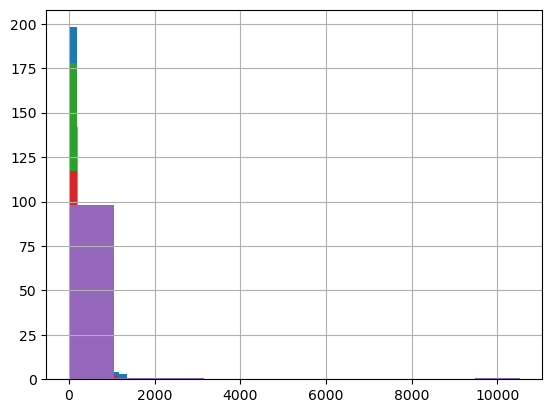

In [57]:
dataset.groupby('month')['duration'].hist()

In [58]:
dataset.groupby('month')['norm_duration'].hist(legend = True)

KeyError: 'Column not found: norm_duration'

***Pivot***

In [59]:
# Es similar a las tablas dinámicas de Excel

dataset.pivot_table(values = 'duration', index = 'month', columns = 'key_bin', aggfunc = 'max')

key_bin,D0,D1,na
month,,,
2014-11,101.0,1940.0,34.429
2014-12,114.0,2120.0,34.429
2015-01,106.0,1859.0,34.429
2015-02,104.0,1863.0,34.429
2015-03,107.0,10528.0,34.429


In [60]:
dataset.pivot_table(values = 'duration', index = ['month', 'network'], columns = 'key_bin', margins = True, margins_name = 'Totales')

key_bin                   D0           D1         na      Totales
month   network                                                  
2014-11 Meteor     19.875000   272.400000   1.000000    66.565217
        Tesco      11.076923   557.285714   1.000000   176.000000
        Three      31.523810   655.333333   1.000000   195.046875
        Vodafone   21.250000   497.000000   1.000000    55.329114
        data             NaN          NaN  34.429000    34.429000
        landline    5.000000   965.333333        NaN   581.200000
        special          NaN          NaN   1.000000     1.000000
        voicemail  50.166667          NaN        NaN    50.166667
2014-12 Meteor     51.142857   330.400000   1.000000    84.250000
        Tesco      37.666667   265.500000   1.000000   140.000000
        Three      18.904762   657.666667   1.000000   147.186047
        Vodafone   35.555556   982.000000   1.000000    47.142857
        data             NaN          NaN  34.429000    34.429000
        landline   23.000000   654.500000        NaN   203.428571
        voicemail  65.333333   149.000000        NaN    86.250000
        world            NaN          NaN   1.000000     1.000000
2015-01 Meteor     26.500000   356.600000   1.000000    71.516129
        Tesco      39.400000   386.714286   1.000000   193.800000
        Three      27.466667   548.454545   1.000000   109.796610
        Vodafone   27.600000   670.000000   1.000000    66.654545
        data             NaN          NaN  34.429000    34.429000
        landline   48.428571   316.000000        NaN   145.727273
        voicemail  70.000000   145.000000        NaN    95.000000
2015-02 Meteor     32.666667  1090.000000   1.000000   237.800000
        Tesco      62.111111   320.727273   1.000000   185.863636
        Three      38.769231   641.666667   1.000000   190.606061
        Vodafone    6.333333   461.250000   1.000000    62.900000
        data             NaN          NaN  34.429000    34.429000
        landline   52.833333   206.500000        NaN    91.250000
        special          NaN          NaN   1.000000     1.000000
        voicemail  44.666667          NaN        NaN    44.666667
2015-03 Meteor     27.333333   192.000000        NaN    68.500000
        Tesco      60.000000   170.600000   1.000000    88.818182
        Three      67.800000   771.166667   1.000000   310.687500
        Vodafone   41.250000   558.000000   1.000000   153.304348
        data             NaN          NaN  34.429000    34.429000
        landline   35.500000  2311.400000        NaN  1070.000000
        voicemail  57.750000          NaN        NaN    57.750000
        world            NaN          NaN   1.000000     1.000000
Totales            34.004184   565.060403  12.344683   117.804036